In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sea
# from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, SequentialFeatureSelector, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

## Atributi

| Atribut | Znacenje                                | Vrednosti                       |
|---------|-----------------------------------------|---------------------------------|
| age     | godine (numericki)                      |                                 |
| bp      | pritisak u krvi (numericki)             |                                 |
| sg      | specifična težina urina (nominalna)     | (1.005,1.010,1.015,1.020,1.025) |
| al      | albumini u mokraci (nominalna)          | (0,1,2,3,4,5)                   |
| su      | secer (nominalna)                       | (0,1,2,3,4,5)                   |
| rbc     | broj crvenih krvnih zrnaca  (nominalno) | (normalno,abnormalno)           |
| pcc     | gustina gnojnih celija (nominalno)      | (normalno,abnormalno)           |
| ba      | bakterija (nominalna)                   | (prisutna,nije prisutna)        |
| bgr     | nivo šećera u krvi (numericki)          |                                 |
| bu      | nivo krvi u urinu (numericki)           |                                 |
| sc      | serum kreatinin (numericki)             |                                 |
| sod     | natrijum (numericki)                    |                                 |
| spot    | kalijum (numericki)                     |                                 |
| hemo    | hemoglobin (numericki)                  |                                 |
| pcv     | hemokrit (numericki)                    |                                 |
| wc      | broj belih krvnih zrnaca  (numericki)   |                                 |
| rc      | broj crvenih krvnih zrnaca  (numericki) |                                 |
| htn     | hipertenzija(nominalni)                 | (da/ne)                         |
| dm      | dijabetes (nominalni)                   | (da/ne)                         |
| cad     | bolest koronarnih aterija (nominalni)   | (da/ne)                         |
| appet   | apetit(nominalni)                       | (dobar/los)                     |
| pe      | Edem na ekstremitetima (nominalni)      | (da/ne)                         |
| ane     | anemija (nominalni)                     | (da/ne)                         |
| class   | da li ima bolest (nominalni)            | (da/ne)                         |
















### Napomena
U datasetu se podaci koji nisu poznati označavaju sa ?


## Priprema podataka
Ucitavanje podataka

In [73]:
data = pd.read_csv("ckd.csv")
data.columns = ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
                'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
data = data.drop(columns=['id'])
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


Prebacivanje vrednosti iz ? u NaN

In [74]:
data = data.replace(to_replace='?', value=np.nan)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [75]:
data.shape

(400, 25)

In [76]:
data.describe

<bound method NDFrame.describe of     age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0    48  80   1.02  1  0     NaN    normal  notpresent  notpresent  121  ...   
1     7  50   1.02  4  0     NaN    normal  notpresent  notpresent  NaN  ...   
2    62  80   1.01  2  3  normal    normal  notpresent  notpresent  423  ...   
3    48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4    51  80   1.01  2  0  normal    normal  notpresent  notpresent  106  ...   
..   ..  ..    ... .. ..     ...       ...         ...         ...  ...  ...   
395  55  80   1.02  0  0  normal    normal  notpresent  notpresent  140  ...   
396  42  70  1.025  0  0  normal    normal  notpresent  notpresent   75  ...   
397  12  80   1.02  0  0  normal    normal  notpresent  notpresent  100  ...   
398  17  60  1.025  0  0  normal    normal  notpresent  notpresent  114  ...   
399  58  80  1.025  0  0  normal    normal  notpresent  notpresent  131  ...   

    p

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     391 non-null    object
 1   bp      388 non-null    object
 2   sg      353 non-null    object
 3   al      354 non-null    object
 4   su      351 non-null    object
 5   rbc     248 non-null    object
 6   pc      335 non-null    object
 7   pcc     396 non-null    object
 8   ba      396 non-null    object
 9   bgr     356 non-null    object
 10  bu      381 non-null    object
 11  sc      383 non-null    object
 12  sod     313 non-null    object
 13  pot     312 non-null    object
 14  hemo    348 non-null    object
 15  pcv     329 non-null    object
 16  wbcc    294 non-null    object
 17  rbcc    269 non-null    object
 18  htn     398 non-null    object
 19  dm      398 non-null    object
 20  cad     398 non-null    object
 21  appet   399 non-null    object
 22  pe      399 non-null    ob

In [78]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['bp'] = pd.to_numeric(data['bp'], errors='coerce')
data['bgr'] = pd.to_numeric(data['bgr'], errors='coerce')
data['bu'] = pd.to_numeric(data['bu'], errors='coerce')
data['sc'] = pd.to_numeric(data['sc'], errors='coerce')
data['sod'] = pd.to_numeric(data['sod'], errors='coerce')
data['pot'] = pd.to_numeric(data['pot'], errors='coerce')
data['hemo'] = pd.to_numeric(data['hemo'], errors='coerce')
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wbcc'] = pd.to_numeric(data['wbcc'], errors='coerce')
data['rbcc'] = pd.to_numeric(data['rbcc'], errors='coerce')

In [79]:
data.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [80]:
data.describe(include="all")

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353,354,351,248,335,396,396,356.000000,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,5,6,6,2,2,2,2,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,1.02,0,0,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,106,199,290,201,259,354,374,NaN,...,NaN,NaN,NaN,251,261,364,317,323,339,250
mean,51.483376,76.469072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.036517,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.281714,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.000000,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
nominalColumns = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

In [82]:
data_without_wbcc_pcv=data.drop(axis=1,columns=['wbcc','pcv'])
data_without_wbcc_pcv.shape

(400, 23)

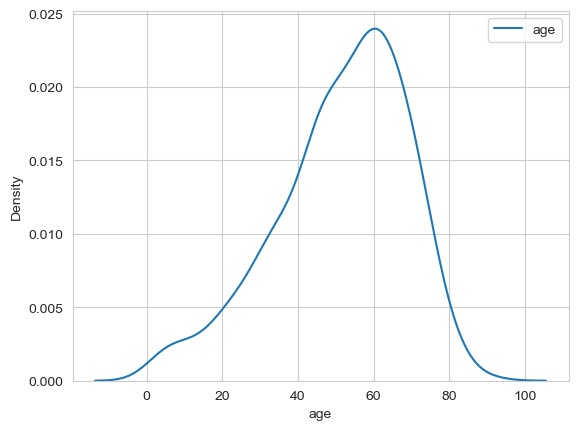

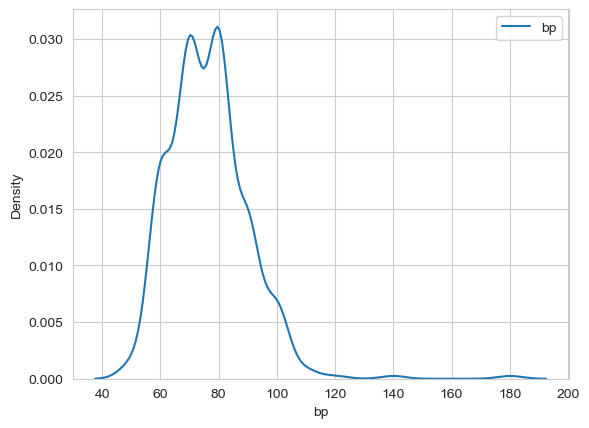

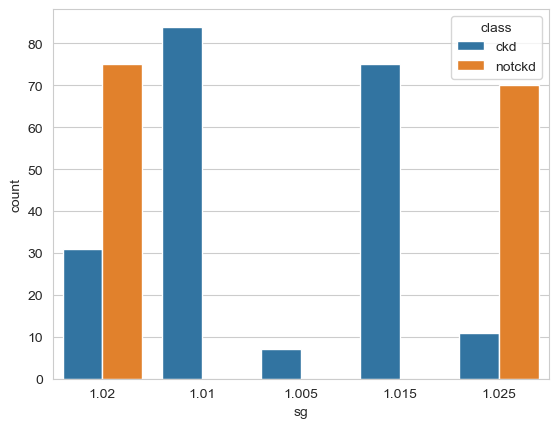

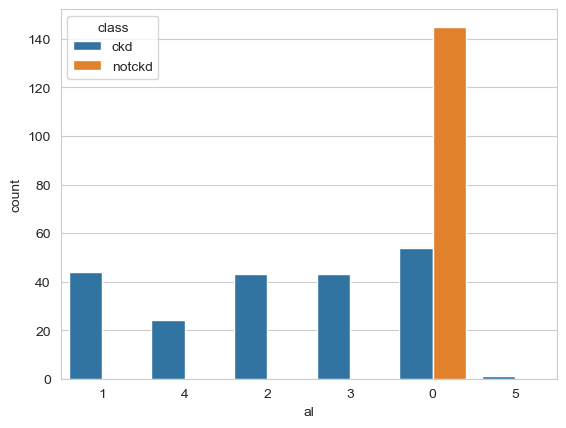

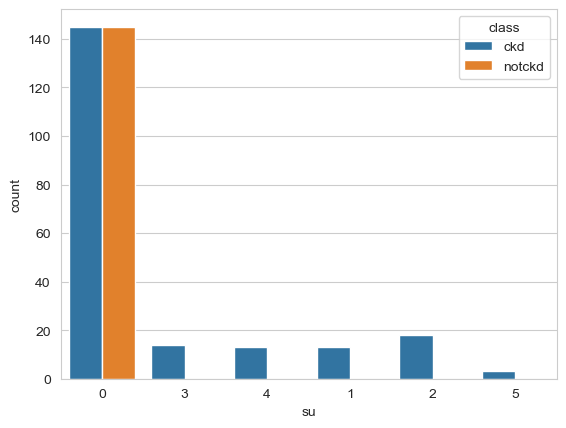

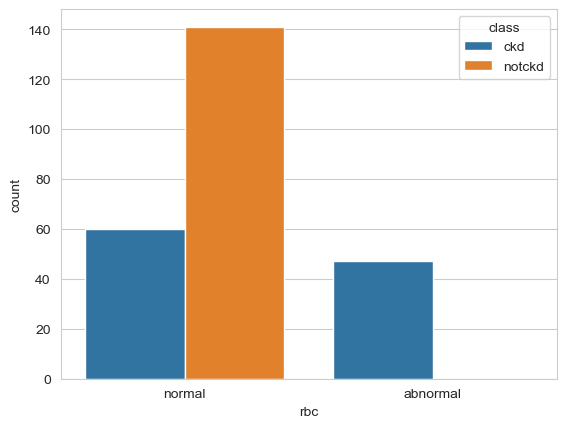

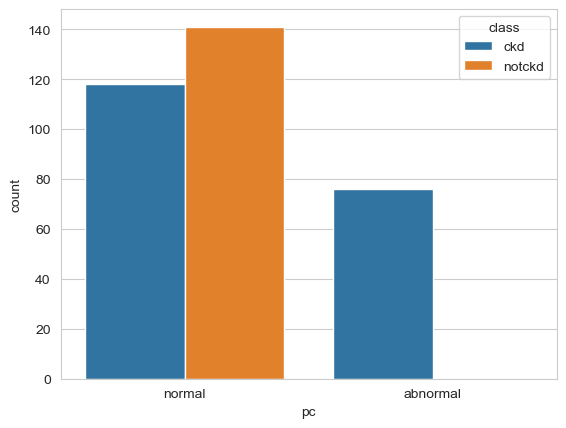

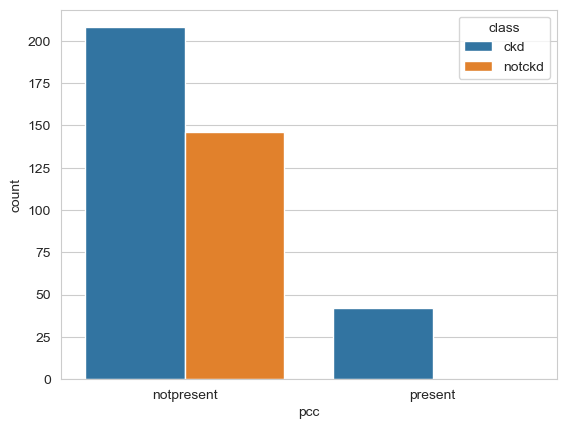

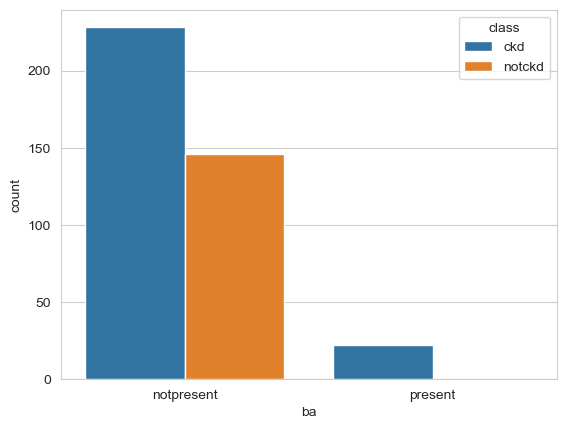

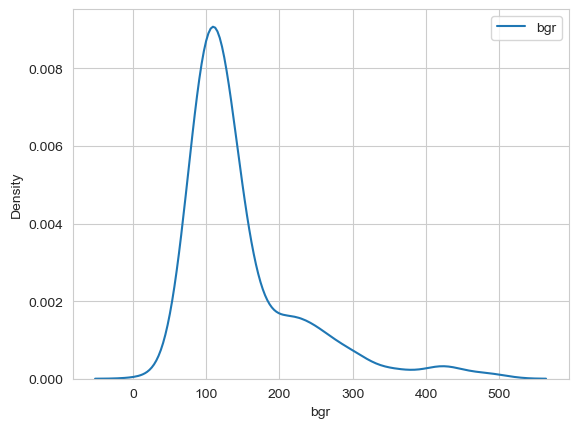

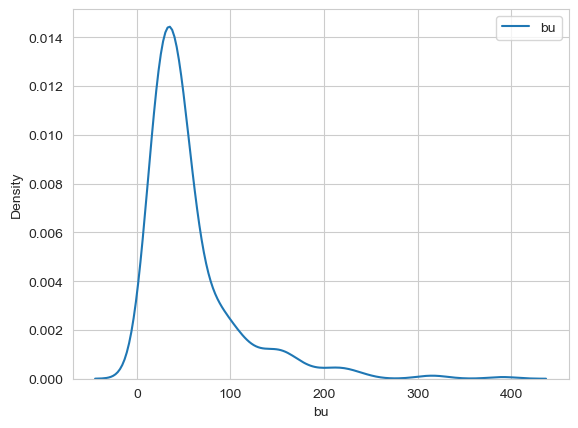

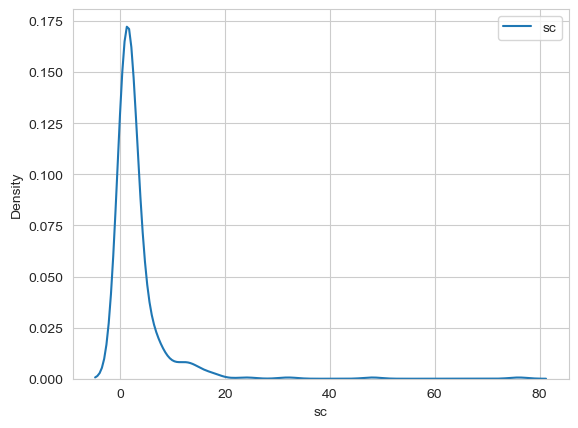

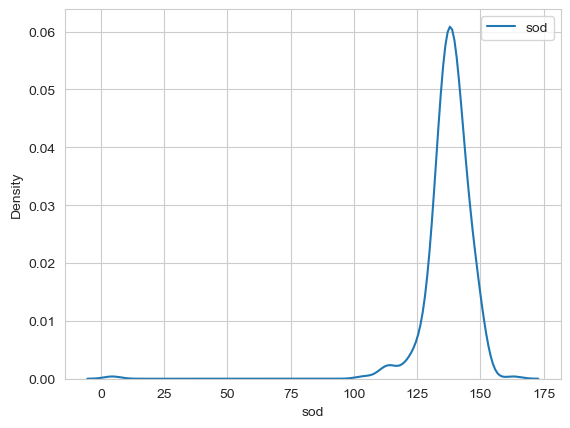

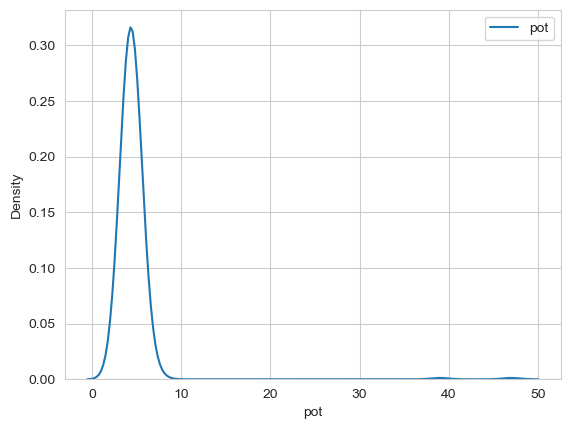

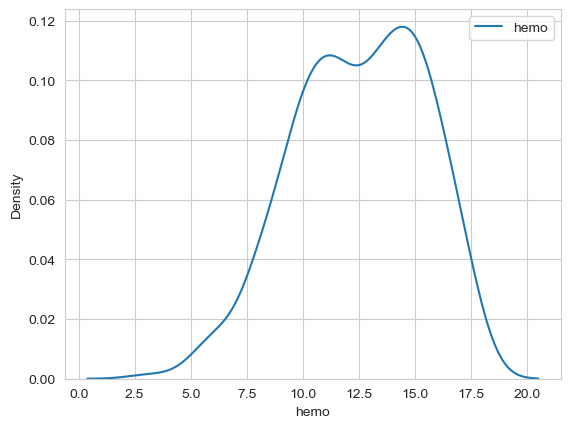

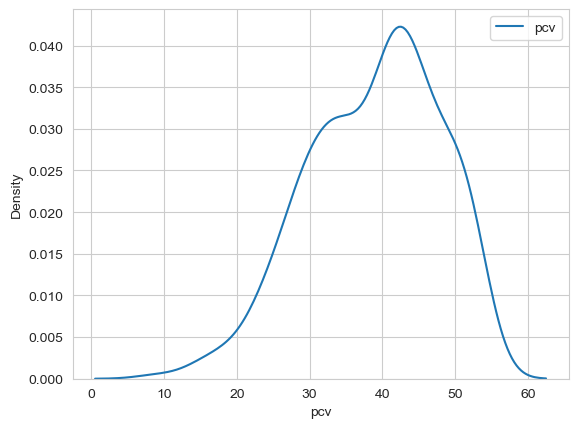

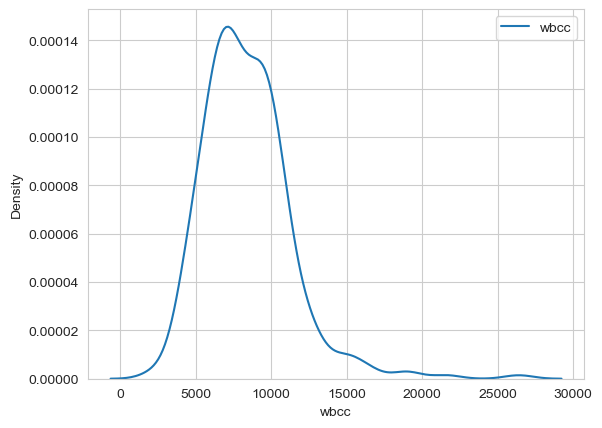

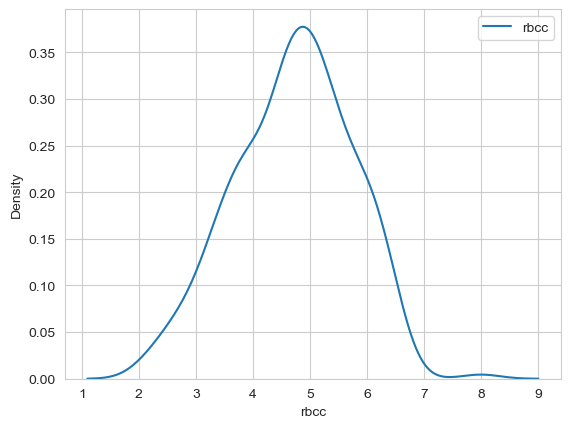

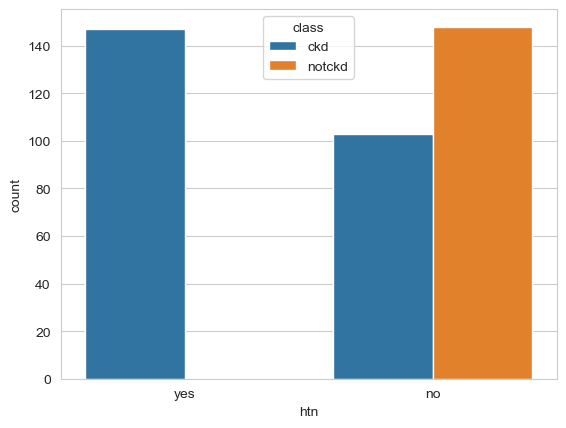

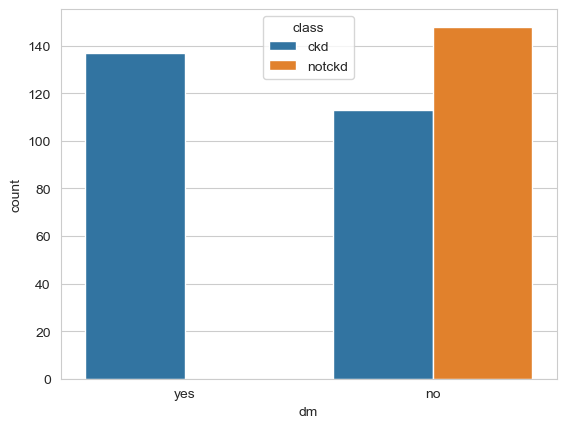

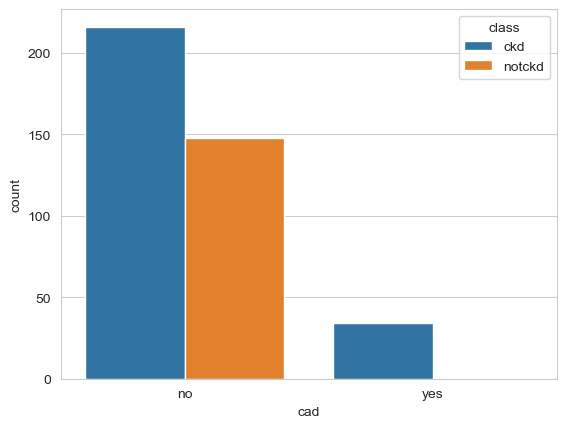

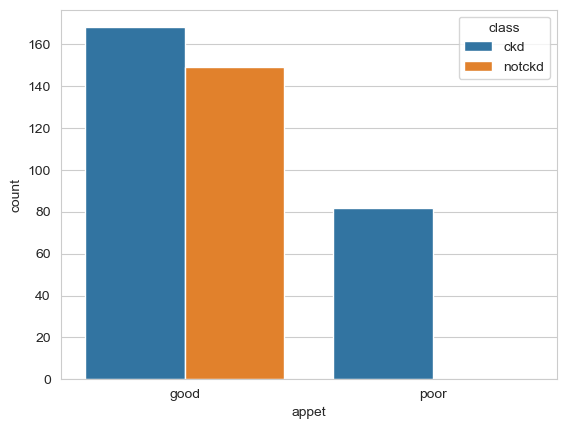

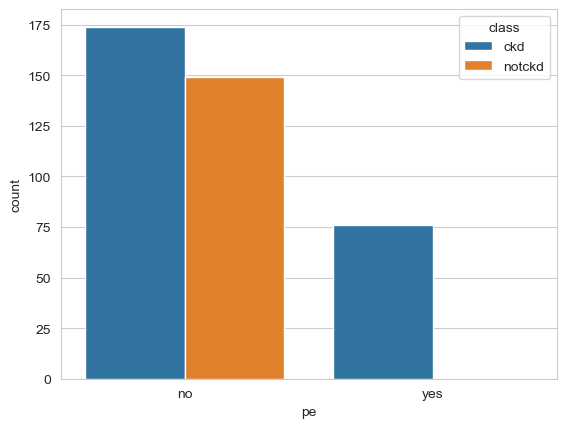

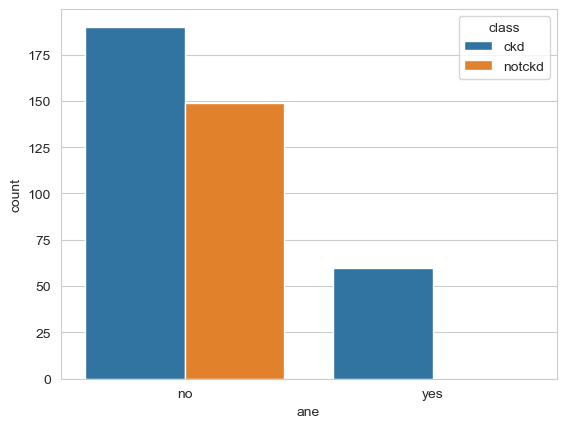

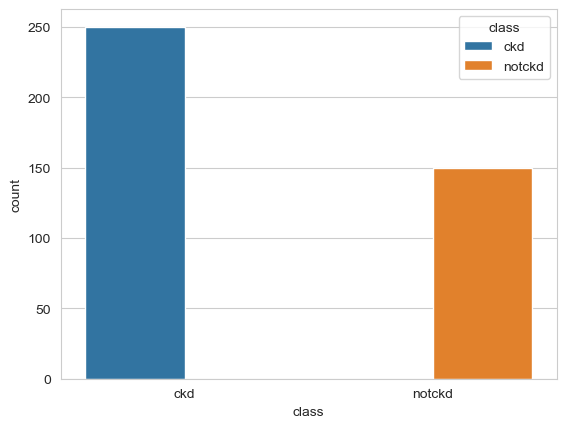

In [83]:
def showData(data):
    for col in data:
        if (col in nominalColumns):
            sea.countplot(data=data, x=col, hue='class')
        else:
            ax = sea.kdeplot(data[[col]])
            ax.set(xlabel=col)
        plt.show()


showData(data)


# Encoding Categorical Features - sg,al,su su vec u numerickom obliku

In [84]:
from sklearn.impute import SimpleImputer


# impute

def impute(data):
    imputedDataMean = pd.DataFrame()

    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mostFrequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    for col in data:
        if (col in nominalColumns):
            imp_mostFrequent = imp_mostFrequent.fit(data[[col]])
            imputedDataMean[col] = imp_mostFrequent.transform(data[[col]]).ravel()
        else:
            imp_mean = imp_mean.fit(data[[col]])
            imputedDataMean[col] = imp_mean.transform(data[[col]]).ravel()

    return imputedDataMean

# print(data.iloc[1])
# print(imputedDataMean.iloc[1])



In [85]:
# from nominal to numeric

def from_nominal_to_numeric(data):
    new_data = data
    le = LabelEncoder()
    for col in nominalColumns:
        # print(data[col])
        le.fit(data[col])
        new_data[col] = le.transform(data[col])
    return new_data


# data
#
from_nominal_to_numeric(data)
# test.head()



,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,4,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,3,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,4,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [86]:
# columns with missing data

columns_with_missing_data = data.columns[data.isna().any()].tolist()
print(columns_with_missing_data)
data.isnull().mean()

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


age      0.0225
bp       0.0300
sg       0.0000
al       0.0000
su       0.0000
rbc      0.0000
pc       0.0000
pcc      0.0000
ba       0.0000
bgr      0.1100
bu       0.0475
sc       0.0425
sod      0.2175
pot      0.2200
hemo     0.1300
pcv      0.1775
wbcc     0.2650
rbcc     0.3275
htn      0.0000
dm       0.0000
cad      0.0000
appet    0.0000
pe       0.0000
ane      0.0000
class    0.0000
dtype: float64

In [87]:
print(data.shape)


# remove duplciates

def remove_duplicates(data):
    data_without_duplicates = data.drop_duplicates()
    return data_without_duplicates


remove_duplicates(data)

# NEMA DUPLIKATA

(400, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,4,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,3,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,4,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [88]:
# scaling

def min_max_scaler(data):
    if ((data.values < 0).any() is True):
        scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
        minmax_df = pd.DataFrame(scaler.fit_transform(data.values), columns=data.columns, index=data.index)
    else:
        scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
        minmax_df = pd.DataFrame(scaler.fit_transform(data.values), columns=data.columns, index=data.index)
    return minmax_df


min_max_scaler(remove_duplicates(from_nominal_to_numeric(data)))
# test


def standard_scaler(data):
    scale=StandardScaler()
    datapom=pd.DataFrame()
    clas = data['class']
    datapom = data.loc[:, data.columns != 'class']
    datapom = pd.DataFrame(scale.fit_transform(datapom.values), columns=datapom.columns, index=data.index)
    datapom['class'] = clas
    return datapom







1) Missing Values

In [89]:

from sklearn.covariance import EllipticEnvelope




def remove_outliers_elliptic(data):
    without_outliers = pd.DataFrame()

    # TODO Pitati profesora za support fraction
    outlier_detector = EllipticEnvelope(contamination=0.1,support_fraction=1)
    outlier_detector.fit(data)
    without_outliers = outlier_detector.predict(data)
    indexes_of_outliers = np.where(without_outliers == -1)
    data = data.drop(indexes_of_outliers[0])

    return data


def remove_outliers_interquartile(data):
    for ind, row in data.iterrows():
        for col in data:
            if (col not in nominalColumns):
                Q1 = data[col].quantile(0.25)
                Q3 = data[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - (IQR * 1.5)
                upper_bound = Q3 + (IQR * 1.5)
                if ((row[col] < lower_bound) | (row[col] > upper_bound)):
                    data = data.drop([ind])
                    break

    return data





In [90]:
min_max_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv))))

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.047803,0.836735,0.525424,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.269309,...,0.047803,0.557823,0.441938,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,...,0.047803,0.442177,0.441938,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.202991,...,0.000000,0.551020,0.305085,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.047803,0.578231,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.252137,...,0.053933,0.857143,0.474576,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,0.454545,0.153846,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.113248,...,0.022472,0.911565,0.694915,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.113636,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.166667,...,0.042697,0.863946,0.559322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.170455,0.076923,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.196581,...,0.053933,0.755102,0.644068,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Outliers

In [91]:
remove_outliers_elliptic(min_max_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv)))))

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.047803,0.836735,0.525424,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.269309,...,0.047803,0.557823,0.441938,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,...,0.047803,0.442177,0.441938,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.047803,0.578231,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.659091,0.307692,0.50,0.6,0.0,1.0,1.0,0.0,0.0,0.111111,...,0.015730,0.619048,0.389831,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.252137,...,0.053933,0.857143,0.474576,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,0.454545,0.153846,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.113248,...,0.022472,0.911565,0.694915,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.113636,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.166667,...,0.042697,0.863946,0.559322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.170455,0.076923,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.196581,...,0.053933,0.755102,0.644068,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
remove_outliers_interquartile(min_max_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv)))))

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.047803,0.836735,0.525424,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.047803,0.578231,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.659091,0.307692,0.50,0.6,0.0,1.0,1.0,0.0,0.0,0.111111,...,0.015730,0.619048,0.389831,1.0,1.0,0.0,0.0,1.0,0.0,0.0
13,0.750000,0.153846,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.162393,...,0.020225,0.455782,0.441938,1.0,1.0,1.0,1.0,1.0,0.0,0.0
16,0.511364,0.153846,0.50,0.4,0.0,1.0,1.0,0.0,0.0,0.164530,...,0.035955,0.646259,0.441938,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.465909,0.076923,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.202991,...,0.042697,0.673469,0.559322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,0.545455,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.245726,...,0.056180,0.748299,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.113636,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.166667,...,0.042697,0.863946,0.559322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.170455,0.076923,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.196581,...,0.053933,0.755102,0.644068,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
clean_data_eliptic = remove_outliers_elliptic(standard_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv)))))
clean_data_interquartile = remove_outliers_interquartile(standard_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv)))))

In [94]:
def hold_out_cross_validation (data,target,test_size):
    data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=test_size, random_state=42,shuffle=True)
    return [data_train, data_test, target_train, target_test]

# Optimizacija Hyperparametara

In [95]:
# Hyperparameter
def hyperparameters(data,t):
    Data = data.loc[:, data.columns != 'class']
    target = pd.DataFrame()
    target['class'] = data['class']
    data_train, data_test, target_train, target_test = train_test_split(Data, target, test_size=t, random_state=42,shuffle=True)

    # print(data_train.shape),print(target_train.shape)
    # print(data_test.shape),print(target_test.shape)

    print("######## GridSearchCV ########")

    grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
                    'weights' : ['uniform','distance'],
                    'metric' : ['minkowski','euclidean','manhattan']}

    knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
    knn_gs_res = knn_gs.fit(data_train, target_train.values.ravel())

    print("KNN grid-search")
    print(knn_gs_res.best_score_)
    print(knn_gs_res.best_params_)

    # DecisionTree
    grid_params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
    dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42), grid_params, verbose=1, cv=3)
    dt_gs_rs = dt_gs.fit(data_train, target_train.values.ravel())

    print("Decision tree grid-search")
    print(dt_gs_rs.best_score_)
    print(dt_gs_rs.best_params_)

    # LinearSVC
    grid_params = {'C': [0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    linearsvc_gs = GridSearchCV(LinearSVC(random_state=42), grid_params, verbose=1, cv=3)
    linearsvc_gs_rs = linearsvc_gs.fit(data_train, target_train.values.ravel())

    print("LinearSVC grid-search")
    print(linearsvc_gs_rs.best_score_)
    print(linearsvc_gs_rs.best_params_)

    # RandomForestClassifier
    grid_params = {'n_estimators': list(range(1, 100))}
    random_forest_gs = GridSearchCV(RandomForestClassifier(random_state=42), grid_params, verbose=1, cv=3)
    random_forest_gs_rs = random_forest_gs.fit(data_train, target_train.values.ravel())

    print("RandomForestClassifier grid-search")
    print(random_forest_gs_rs.best_score_)
    print(random_forest_gs_rs.best_params_)

    # PCA
    grid_params = {'n_components': list(range(1, 23))}
    PCA_gs = GridSearchCV(PCA(random_state=42), grid_params, verbose=1, cv=3)
    PCA_gs_rs = PCA_gs.fit(data_train, target_train.values.ravel())

    print("PCA grid-search")
    print(PCA_gs_rs.best_score_)
    print(PCA_gs_rs.best_params_)


    print("######## RandomizedSearchCV  ########")

    params = { 'n_neighbors' : [5,7,9,11,13,15],
                    'weights' : ['uniform','distance'],
                    'metric' : ['minkowski','euclidean','manhattan']}

    knn_rs = RandomizedSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
    knn_rs_res = knn_rs.fit(data_train, target_train.values.ravel())

    print("KNN randomize-search")
    print(knn_rs_res.best_score_)
    print(knn_rs_res.best_params_)

    # DecisionTree
    params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
    dt_rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
    dt_rs_res = dt_rs.fit(data_train, target_train.values.ravel())

    print("Decision tree randomize-search ")
    print(dt_rs_res.best_score_)
    print(dt_rs_res.best_params_)

    grid_params = {'C': [0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    linearsvc_rs = RandomizedSearchCV(LinearSVC(random_state=42), grid_params, verbose=1, cv=3)
    linearsvc_rs_rs = linearsvc_rs.fit(data_train, target_train.values.ravel())

    print("LinearSVC randomize-search")
    print(linearsvc_rs_rs.best_score_)
    print(linearsvc_rs_rs.best_params_)

    # RandomForestClassifier
    grid_params = {'n_estimators': list(range(1, 100))}
    random_forest_rs = RandomizedSearchCV(RandomForestClassifier(random_state=42), grid_params, verbose=1, cv=3)
    random_forest_rs_rs = random_forest_rs.fit(data_train, target_train.values.ravel())

    print("RandomForestClassifier randomize-search")
    print(random_forest_rs_rs.best_score_)
    print(random_forest_rs_rs.best_params_)

    # PCA
    grid_params = {'n_components': list(range(1, 23))}
    PCA_rs = RandomizedSearchCV(PCA(random_state=42), grid_params, verbose=1, cv=3)
    PCA_rs_rs = PCA_rs.fit(data_train, target_train.values.ravel())

    print("PCA grid-search")
    print(PCA_rs_rs.best_score_)
    print(PCA_rs_rs.best_params_)




# Klasifikatori

In [96]:
def Gaussan(data,name,visualize,t):
    Data = data.loc[:, data.columns != 'class']
    target = pd.DataFrame()
    target['class'] = data['class']

    # Kros validacija
    data_train, data_test, target_train, target_test = hold_out_cross_validation(Data,target,0.3)
    gaus=GaussianNB()
    pred=gaus.fit(data_train,target_train.values.ravel()).predict(data_test)
    print("Naive Bayes "+name+"  accuracy: ", accuracy_score(target_test,pred,normalize=True))
    print(classification_report(target_test,pred))
    if(visualize):
        fpr, tpr, thresholds = metrics.roc_curve(target_test, pred)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        roc_display.figure_.set_size_inches(5,5)
        plt.plot([0, 1], [0, 1], color = 'g')

    return {'Gaus':{'datatrain':data_train,'targettrain':target_train,'datatest':data_test,'targettest':target_test,'name':name}}

In [97]:
def KNN(data,name,visualize,t):
    Data = data.loc[:, data.columns != 'class']
    target = pd.DataFrame()
    target['class'] = data['class']
    data_train, data_test, target_train, target_test = train_test_split(Data, target, test_size=t, random_state=42,shuffle=True)

    # {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
    neigh=KNeighborsClassifier(n_neighbors=5,metric="manhattan",weights='distance')
    pred = neigh.fit(data_train, target_train.values.ravel()).predict(data_test)
    print("KNN "+name+"  accuracy: ", accuracy_score(target_test, pred, normalize=True))
    print(classification_report(target_test, pred))
    if(visualize):
        fpr, tpr, thresholds = metrics.roc_curve(target_test, pred)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        roc_display.figure_.set_size_inches(5,5)
        plt.plot([0, 1], [0, 1], color = 'g')

    return {
        'KNN': {'datatrain': data_train, 'targettrain': target_train, 'datatest': data_test, 'targettest': target_test,
                'name': name}}

In [98]:
from sklearn import metrics


def LRegression(data,name,visualize,t):
    target = pd.DataFrame()
    target['class'] = data['class']
    Data = data.loc[:, data.columns != 'class']
    data_train, data_test, target_train, target_test = train_test_split(Data, target, test_size=t, random_state=42,
                                                                        shuffle=True)
    lr =LogisticRegression()
    pred = lr.fit(data_train, target_train.values.ravel()).predict(data_test)
    print("Logistic Regression "+name+" accuracy: ", accuracy_score(target_test, pred, normalize=True))
    print(classification_report(target_test, pred))
    if (visualize):
        fpr, tpr, thresholds = metrics.roc_curve(target_test, pred)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        roc_display.figure_.set_size_inches(5,5)
        plt.plot([0, 1], [0, 1], color = 'g')

    return {
        'LR': {'datatrain': data_train, 'targettrain': target_train, 'datatest': data_test, 'targettest': target_test,
               'name': name}}

In [99]:

def DTree(data,name,visualize,t):
    Data = data.loc[:, data.columns != 'class']
    target = pd.DataFrame()
    target['class'] = data['class']
    data_train, data_test, target_train, target_test = train_test_split(Data, target, test_size=t, random_state=42,
                                                                        shuffle=True)



    dt = DecisionTreeClassifier(criterion='gini',max_depth=10)
    pred = dt.fit(data_train, target_train).predict(data_test)
    print("Decision tree"+name+" accuracy: ", accuracy_score(target_test, pred, normalize=True))
    print(classification_report(target_test, pred))


    if (visualize):
        fpr, tpr, thresholds = metrics.roc_curve(target_test, pred)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        roc_display.figure_.set_size_inches(5,5)
        plt.plot([0, 1], [0, 1], color = 'g')

    return {
        'DT': {'datatrain': data_train, 'targettrain': target_train, 'datatest': data_test, 'targettest': target_test,
               'name': name}}

In [100]:
def test_all_classifiers(data,name,visualize,test):
    KNN(data,name,visualize,test)
    Gaussan(data,name,visualize,test)
    LRegression(data,name,visualize,test)
    DTree(data,name,visualize,test)

In [101]:
hyperparameters(remove_outliers_elliptic(standard_scaler(remove_duplicates(from_nominal_to_numeric(impute(data))))),0.3)

######## GridSearchCV ########
Fitting 3 folds for each of 36 candidates, totalling 108 fits
KNN grid-search
0.9841269841269842
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Fitting 3 folds for each of 294 candidates, totalling 882 fits
Decision tree grid-search
0.9722222222222223
{'max_leaf_nodes': 5, 'min_samples_split': 2}
Fitting 3 folds for each of 11 candidates, totalling 33 fits
LinearSVC grid-search
0.9880952380952381
{'C': 0.1}
Fitting 3 folds for each of 99 candidates, totalling 297 fits
RandomForestClassifier grid-search
0.9920634920634921
{'n_estimators': 8}
Fitting 3 folds for each of 22 candidates, totalling 66 fits
PCA grid-search
-26.326057416038974
{'n_components': 22}
######## RandomizedSearchCV  ########
Fitting 3 folds for each of 10 candidates, totalling 30 fits
KNN randomize-search
0.9761904761904763
{'weights': 'uniform', 'n_neighbors': 5, 'metric': 'manhattan'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision tree randomiz

KNN Elliptic, standard scaler, remove duplicates, nominal to numeric, imputer, without wbcc-pcv  accuracy:  0.9814814814814815
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.96      1.00      0.98        43

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108

Naive Bayes Elliptic, standard scaler, remove duplicates, nominal to numeric, imputer, without wbcc-pcv  accuracy:  0.9814814814814815
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.96      1.00      0.98        43

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108

Logistic Regression Elliptic, standard scaler, remove duplicates, nominal to numeric

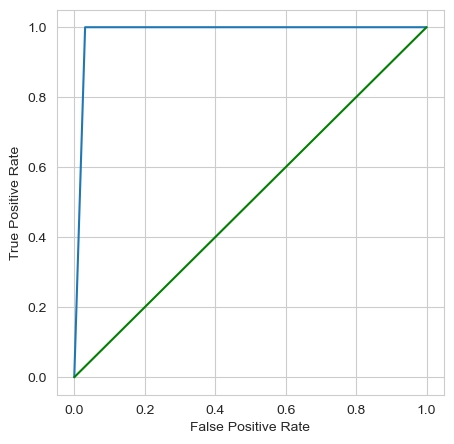

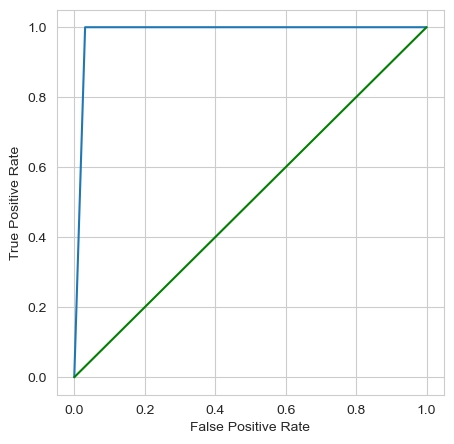

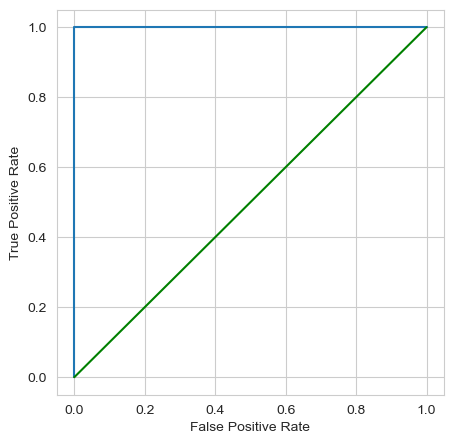

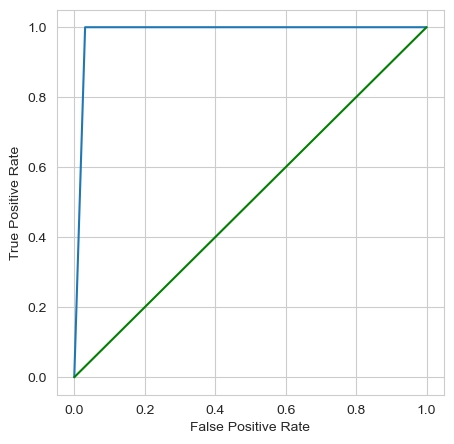

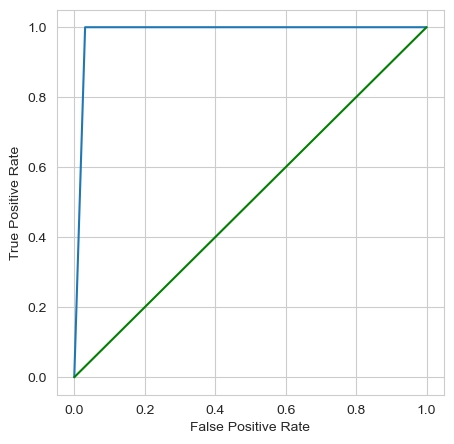

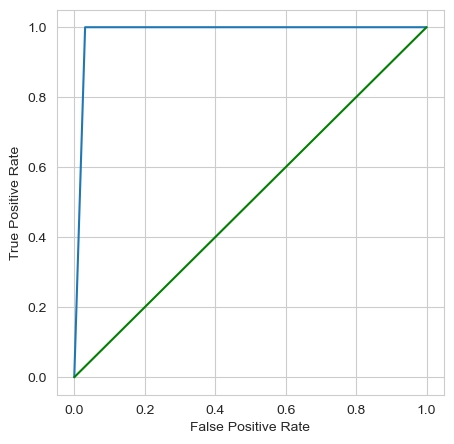

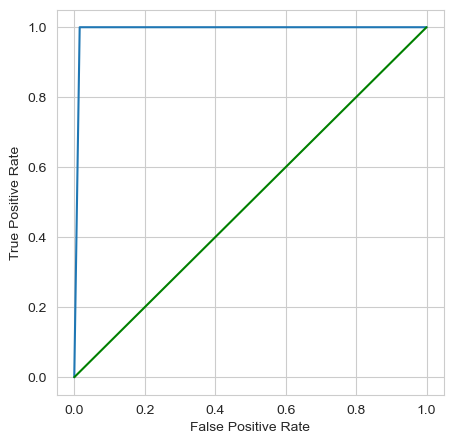

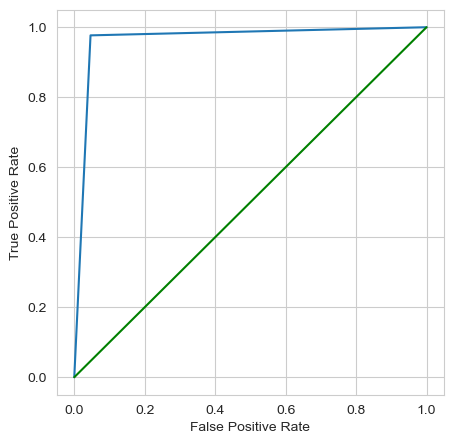

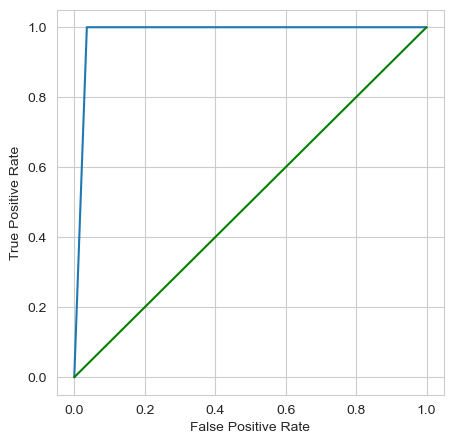

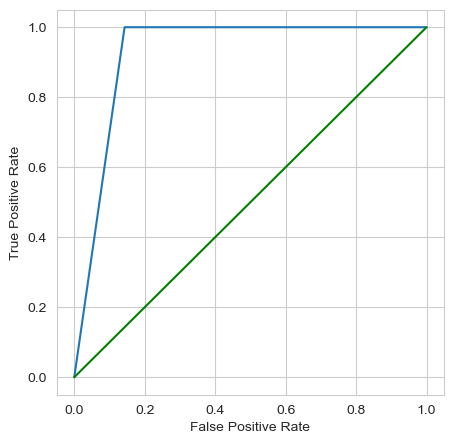

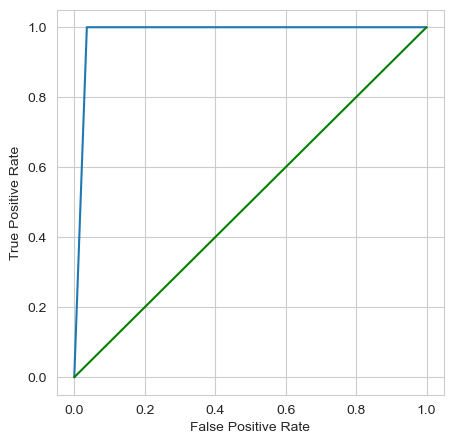

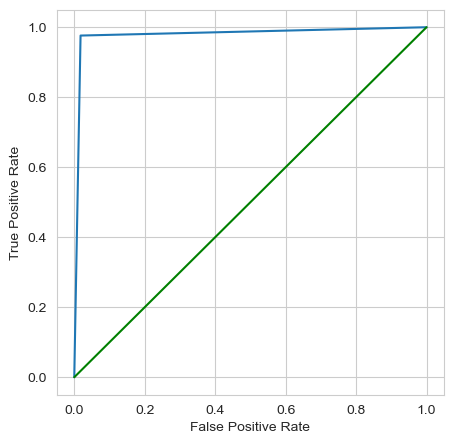

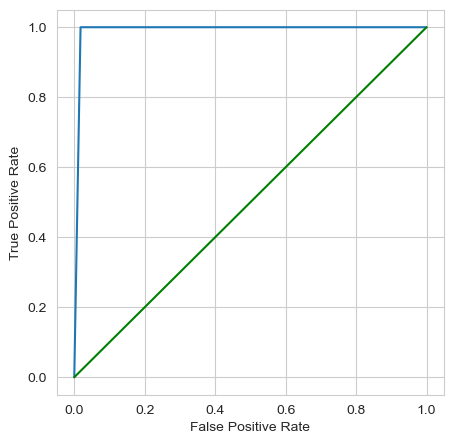

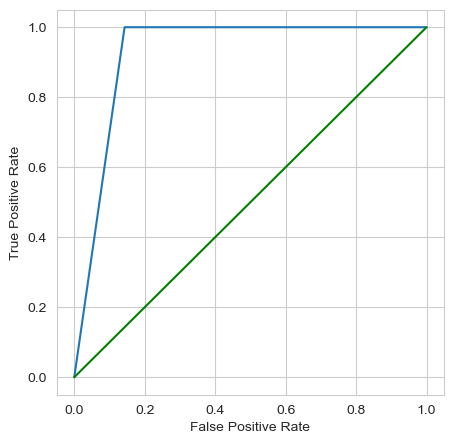

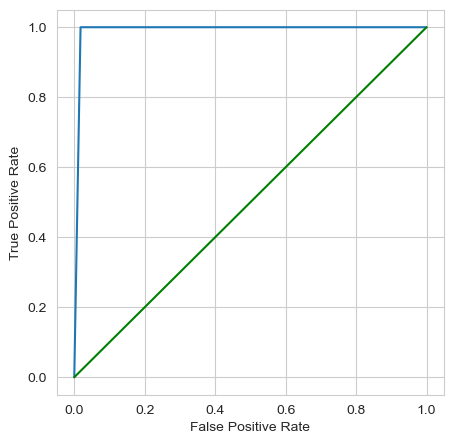

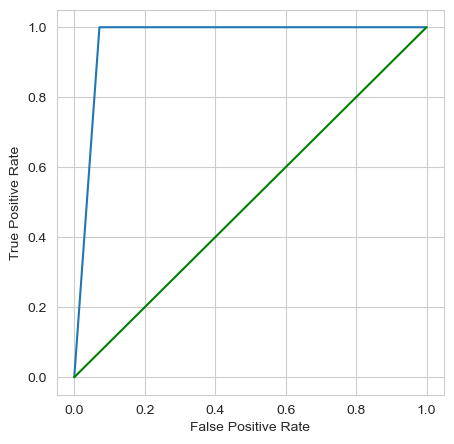

In [115]:


test_all_classifiers(remove_outliers_elliptic(standard_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv))))),
                     "Elliptic, standard scaler, remove duplicates, nominal to numeric, imputer, without wbcc-pcv",
                     True,
                     0.3)
# print("---------------------------------------------")
test_all_classifiers(remove_outliers_elliptic(min_max_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv))))),
                     "Elliptic, min-max scaler, remove duplicates, nominal to numeric, imputer, without wbcc-pcv",
                     True,
                     0.3)
print("---------------------------------------------")
test_all_classifiers(remove_outliers_interquartile(standard_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv))))),
                     "Interquartile , standard scaler, remove duplicates, nominal to numeric, imputer, without wbcc-pcv",
                     False,
                     0.3)
print("---------------------------------------------")
test_all_classifiers(remove_outliers_interquartile(min_max_scaler(remove_duplicates(from_nominal_to_numeric(impute(data_without_wbcc_pcv))))),
                     "Interquartile , min-max scaler, remove duplicates, nominal to numeric, imputer, without wbcc-pcv",
                     False,
                     0.3)
print("#############################################")
print("############## with wbcc-pcv ################")
print("#############################################")
test_all_classifiers(remove_outliers_elliptic(standard_scaler(remove_duplicates(from_nominal_to_numeric(impute(data))))),
                     "Elliptic, standard scaler, remove duplicates, nominal to numeric, imputer,  with wbcc-pcv",
                     True,
                     0.3)
print("---------------------------------------------")
test_all_classifiers(remove_outliers_elliptic(min_max_scaler(remove_duplicates(from_nominal_to_numeric(impute(data))))),
                     "Elliptic, min-max scaler, remove duplicates, nominal to numeric, imputer,  with wbcc-pcv",
                     True,
                     0.3)
print("---------------------------------------------")
test_all_classifiers(remove_outliers_interquartile(standard_scaler(remove_duplicates(from_nominal_to_numeric(impute(data))))),
                     "Interquartile , standard scaler, remove duplicates, nominal to numeric, imputer,  with wbcc-pcv",
                     False,
                     0.3)
print("---------------------------------------------")
test_all_classifiers(remove_outliers_interquartile(min_max_scaler(remove_duplicates(from_nominal_to_numeric(impute(data))))),
                     "Interquartile , min-max scaler, remove duplicates, nominal to numeric, imputer, with wbcc-pcv",
                     False,
                     0.3)

# Selekcija Atributa

age      0.012093
bp       0.015788
sg       0.128784
al       0.135531
su       0.007288
rbc      0.022222
pc       0.025515
pcc      0.005665
ba       0.004070
bgr      0.012023
bu       0.002361
sc       0.027823
sod      0.024823
pot      0.008785
hemo     0.130993
rbcc     0.016174
htn      0.231676
dm       0.072182
cad      0.003097
appet    0.075302
pe       0.026826
ane      0.010978
dtype: float64


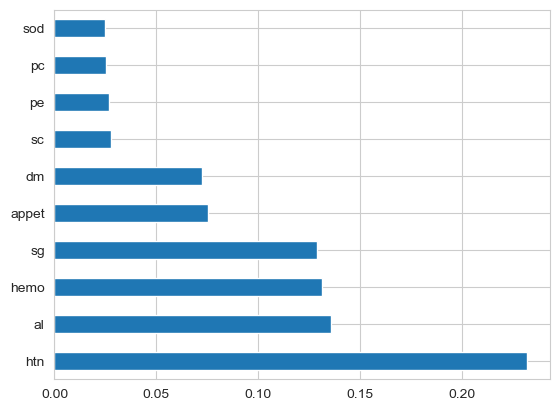

In [103]:
# ExtraTreesClassifier

Data = clean_data_eliptic.loc[:, clean_data_eliptic.columns != 'class']
target = pd.DataFrame()
target['class'] = clean_data_eliptic['class']
model=ExtraTreesClassifier(n_estimators=10)

model.fit(Data,target.values.ravel())

feat_importances = pd.Series(model.feature_importances_, index=Data.columns)
print(feat_importances)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [104]:
from sklearn.feature_selection import f_classif

ft = SelectKBest(f_classif, k = 2).fit(Data, target.values.ravel())
print('Score: ', ft.scores_)
print('Columns: ', Data.columns)

Score:  [ 14.57901499  34.17726334 284.09090909 131.34648164  26.867195
  25.83333333  43.01124744  20.15765766  12.3024055   68.95860457
  57.91026455  94.88833964 114.98240316   2.46211023 423.20595633
 186.52778973 187.66129032 157.94117647  13.984375    61.06823266
  54.24242424  36.18836292]
Columns:  Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane'],
      dtype='object')


In [105]:
# Support Vector Classifier (SVC)

Data = clean_data_eliptic.loc[:, clean_data_eliptic.columns != 'class']
target = pd.DataFrame()
target['class'] = clean_data_eliptic['class']
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(Data, target.values.ravel())
# select features using the meta transformer
selector = SelectFromModel(estimator = lsvc, prefit=True)
X_new = selector.transform(Data)
# X_new.shape[1]

# names of selected features
feature_names = np.array(Data.columns)
feature_names[selector.get_support()]


C:\Users\dimitrije\anaconda3\envs\mlProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array(['bp', 'sg', 'al', 'su', 'rbc', 'bgr', 'sc', 'sod', 'hemo', 'rbcc',
       'htn', 'dm', 'appet', 'pe'], dtype=object)

In [106]:
 # Sequential selection with RandomForestClassifier

Data = clean_data_eliptic.loc[:, clean_data_eliptic.columns != 'class']
target = pd.DataFrame()
target['class'] = clean_data_eliptic['class']

# instantiate model
model = RandomForestClassifier(n_estimators=8, random_state=0)
selector = SequentialFeatureSelector(estimator=model, n_features_to_select=10, direction='backward', cv=2)
selector.fit_transform(Data, target.values.ravel())
feature_names = np.array(Data.columns)
feature_names[selector.get_support()]

array(['sg', 'al', 'su', 'pc', 'sc', 'hemo', 'dm', 'cad', 'appet', 'ane'],
      dtype=object)

In [107]:
# Recursive Feature Elimination (RFE)

data = remove_outliers_elliptic(standard_scaler(remove_duplicates(from_nominal_to_numeric(impute(data)))))
Data = data.loc[:, data.columns != 'class']
target = pd.DataFrame()
target['class'] = data['class']
data_train, data_test, target_train, target_test = train_test_split(Data, target, test_size=0.3, random_state=42,
                                                                    shuffle=True)

def RFE_col(X_train,y_train):
    classifier = LogisticRegression(random_state=0)
    rfe = RFE(classifier)
    fit = rfe.fit(X_train, y_train.values.ravel())
    print("Num Features: %d" % fit.n_features_)
    print("Selected Features: %s" % fit.support_)
    print("Feature Ranking: %s" % fit.ranking_)
    list=fit.support_
    features=[]
    for i,value in enumerate(list):
        if value == True:
            features.append(i)
    rfe_rank = fit.ranking_
    return features




score_rfe_4 = RFE_col(data_train,target_train)
print(score_rfe_4)

rfe_dataset = data.iloc[:, [2, 3, 5, 9, 12, 14, 15, 17, 18, 19, 21, 22,24]]
print(rfe_dataset.shape)

Num Features: 12
Selected Features: [False False  True  True False  True False False False  True False False
  True False  True  True False  True  True  True False  True  True False]
Feature Ranking: [10  2  1  1 12  1  6  3  8  1  7  4  1 13  1  1  5  1  1  1 11  1  1  9]
[2, 3, 5, 9, 12, 14, 15, 17, 18, 19, 21, 22]
(360, 13)


(360, 7)
         PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  class
0   -0.312494 -0.561741  0.825130  0.090252  0.227053 -0.423723    0.0
1   -0.985887  1.824275 -0.604799 -1.361278 -0.392479  0.392774    0.0
2    3.422588 -0.793647  3.410292 -0.765604 -2.785091  0.705619    0.0
3   -0.216888  0.708316 -0.188255  0.011776 -0.437506  0.178139    NaN
4    1.224163  0.188519  0.406648 -1.735875  1.412242  0.642425    0.0
..        ...       ...       ...       ...       ...       ...    ...
355 -2.126443 -0.195891  0.360237  1.120263  0.330529 -0.738927    1.0
356 -3.133617  0.100363 -0.342394 -0.489250 -0.034686  0.272446    1.0
357 -2.386979  0.466929 -0.444363 -0.430244 -0.692437  0.028356    1.0
358 -2.397528  0.131152 -0.717230 -0.323898 -0.302451 -0.443188    1.0
359 -2.691573 -0.078974  0.382363 -0.199629 -0.223183  0.223605    1.0

[360 rows x 7 columns]
KNN  PCA DATASET  accuracy:  0.8611111111111112
              precision    recall  f1-score   support

         0.0

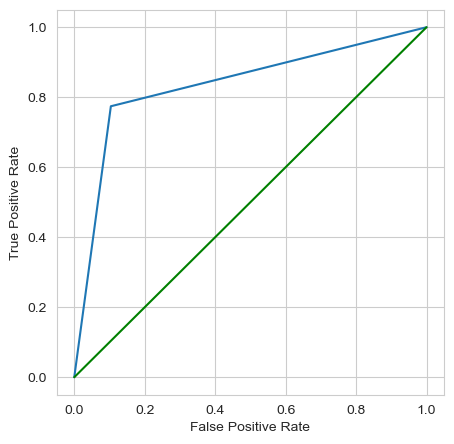

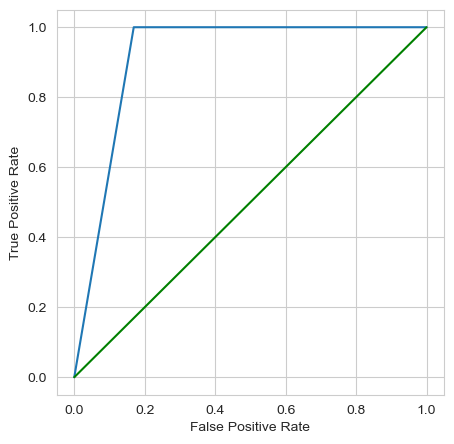

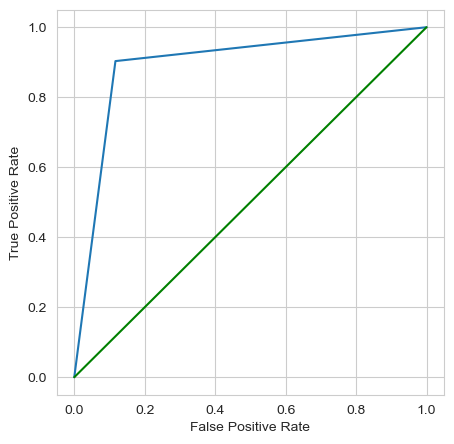

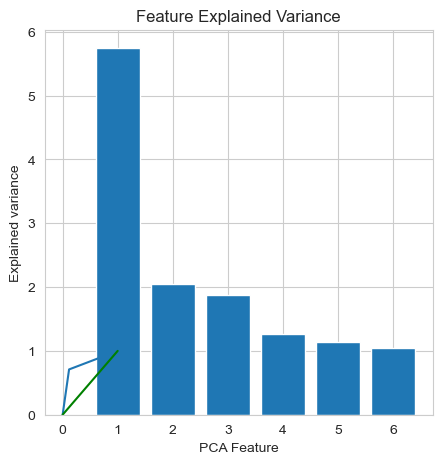

In [119]:

Data = clean_data_eliptic.loc[:, clean_data_eliptic.columns != 'class']
target = pd.DataFrame()
target['class'] = clean_data_eliptic['class']
# scaling data
X_scaled = StandardScaler().fit_transform(Data)
# fit PCA to data
pca = PCA(n_components=6)
pca.fit(X_scaled)


X_pca = pca.transform(X_scaled)
# principalDf = pd.DataFrame(data = X_pca
#                            , columns = ['PC 1',
#                                         'PC 2',
#                                         'PC 3',
#                                         'PC 4',
#                                         'PC 5',
#                                         'PC 6',
#                                         'PC 7',
#                                         'PC 8',
#                                         'PC 9',
#                                         'PC 10',
#                                         'PC 11',
#                                         'PC 12',
#                                         'PC 13',
#                                         'PC 14',
#                                         'PC 15',
#                                         'PC 16',
#                                         'PC 17',
#                                         'PC 18',
#                                         'PC 19',
#                                         'PC 20'])
# principalDf['class'] = clean_data_eliptic['class']

principalDf = pd.DataFrame(data = X_pca
                           , columns = ['PC 1',
                                        'PC 2',
                                        'PC 3',
                                        'PC 4',
                                        'PC 5',
                                        'PC 6'
                                        ])
principalDf['class'] = clean_data_eliptic['class']



print(principalDf.shape)
print(principalDf)

test_all_classifiers(impute(principalDf)," PCA DATASET",True,0.3)

#                      "PCA",
#                      True,
#                      0.3)

plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

evr = pca.explained_variance_ratio_
# visualizing the variance explained by each principal components
# plt.figure(figsize=(12, 5))
# plt.plot(range(0, len(evr)), evr.cumsum(), marker="o", linestyle="--")
# plt.xlabel("Number of components")
# plt.ylabel("Cumulative explained variance")

# pca = decomposition.PCA()

KNN extra_trees_classifier  accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        43

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Naive Bayes extra_trees_classifier  accuracy:  0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        65
           1       0.93      1.00      0.97        43

    accuracy                           0.97       108
   macro avg       0.97      0.98      0.97       108
weighted avg       0.97      0.97      0.97       108

Logistic Regression extra_trees_classifier accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        43

    accuracy   

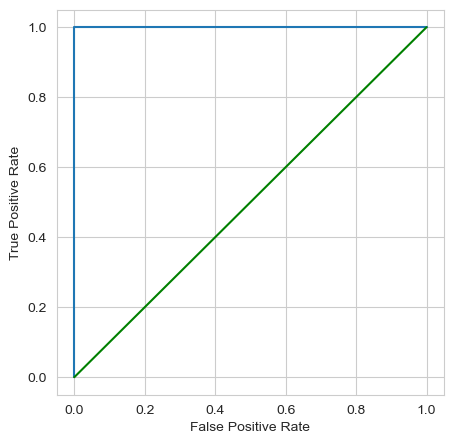

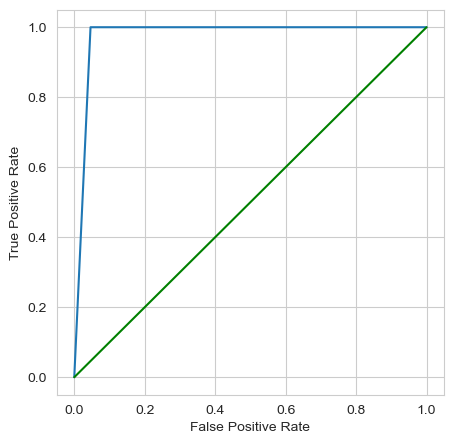

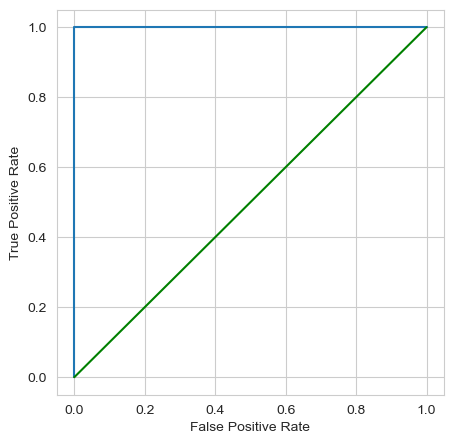

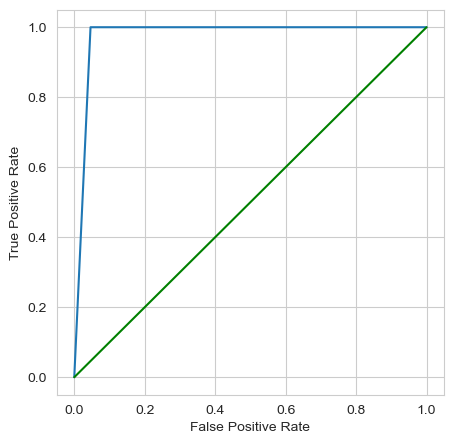

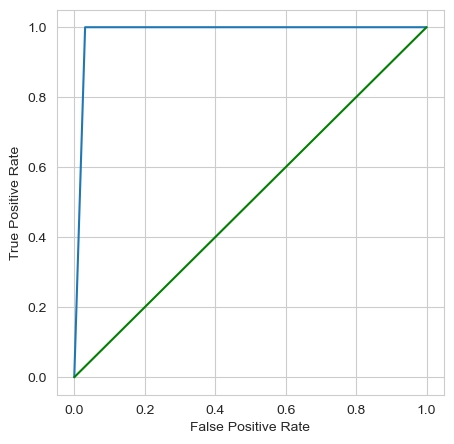

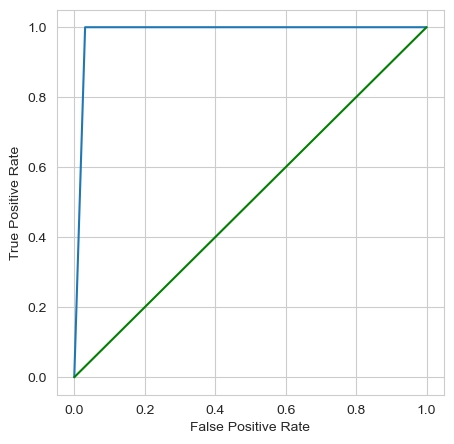

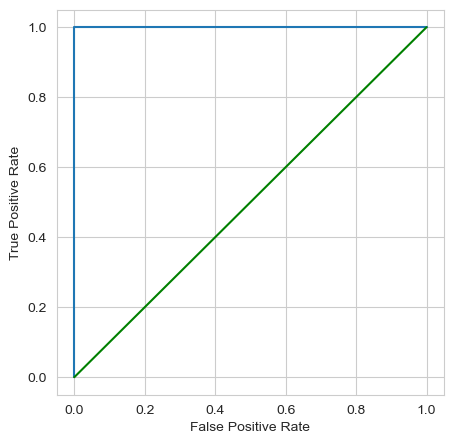

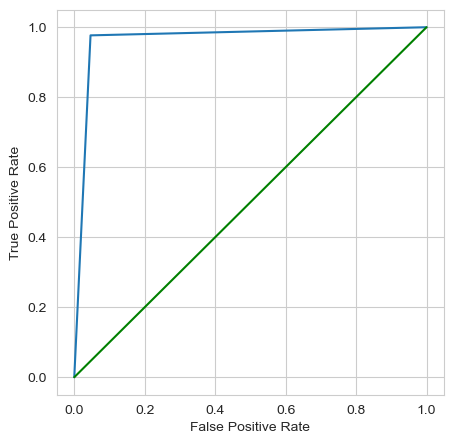

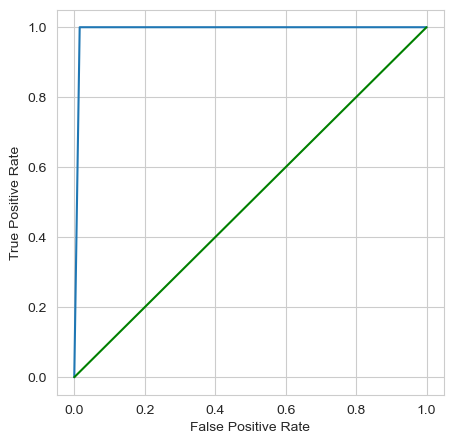

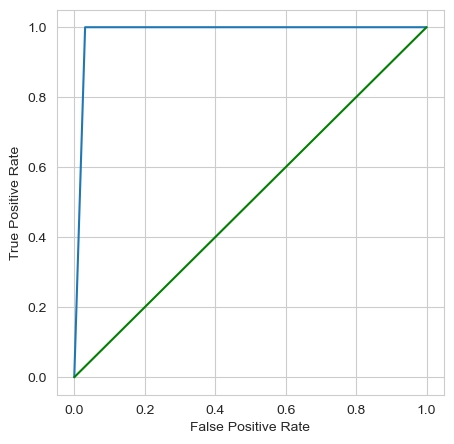

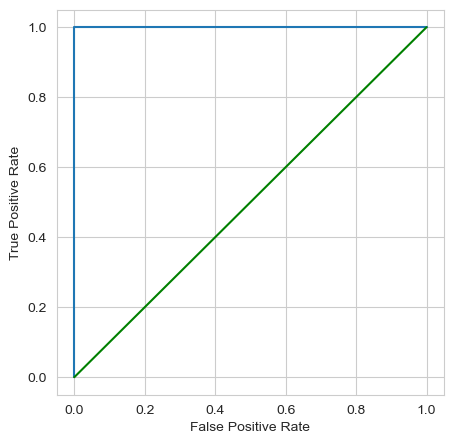

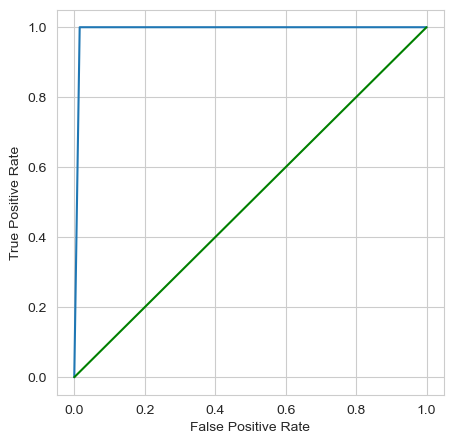

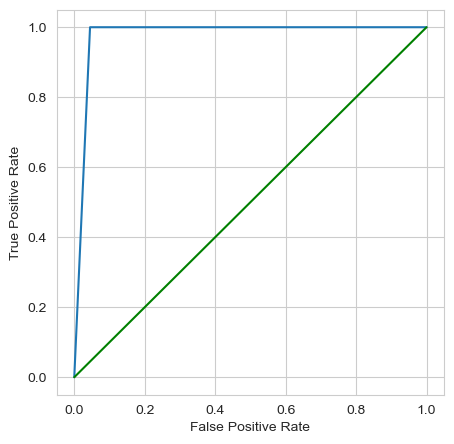

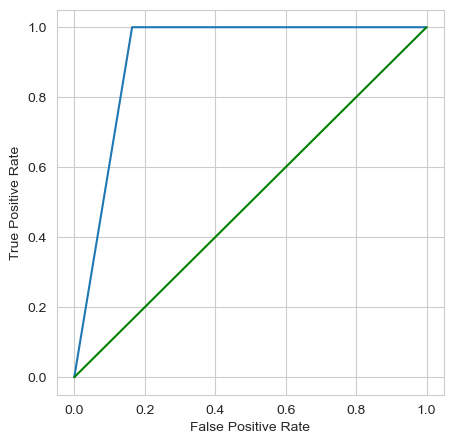

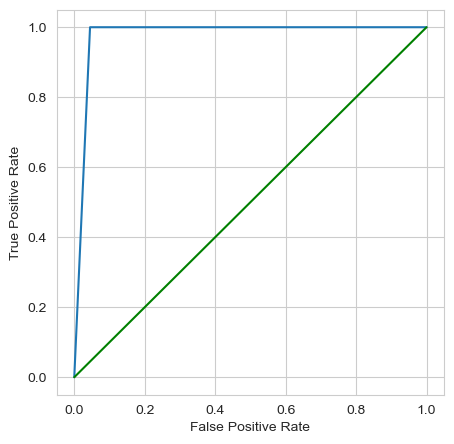

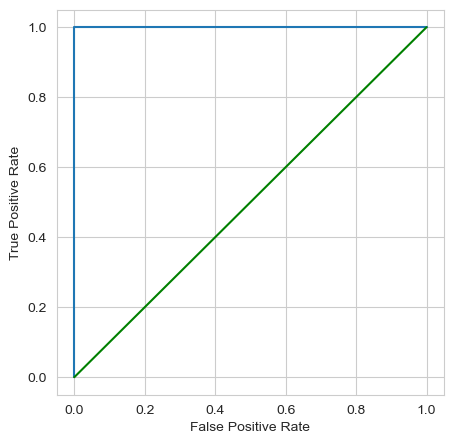

In [109]:
final_extra_trees_classifier = clean_data_eliptic[['hemo','htn','sg','al','dm','rbcc','appet','rbc','pcc','class']]
test_all_classifiers(final_extra_trees_classifier,'extra_trees_classifier',True,0.3)

final_f_clasif = clean_data_eliptic[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
                                     'sc', 'sod', 'pot', 'hemo', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe',
                                     'ane','class']]
test_all_classifiers(final_f_clasif,'f_classif',True,0.3)

final_svc= clean_data_eliptic[['bp', 'sg', 'al', 'su', 'su', 'rbc', 'bgr', 'sc', 'sod', 'hemo', 'rbcc',
                                     'htn', 'dm', 'appet', 'pe','class']]
test_all_classifiers(final_svc,'final_svc',True,0.3)

test_all_classifiers(rfe_dataset,"rfe_dataset",True,0.3)

Regular data


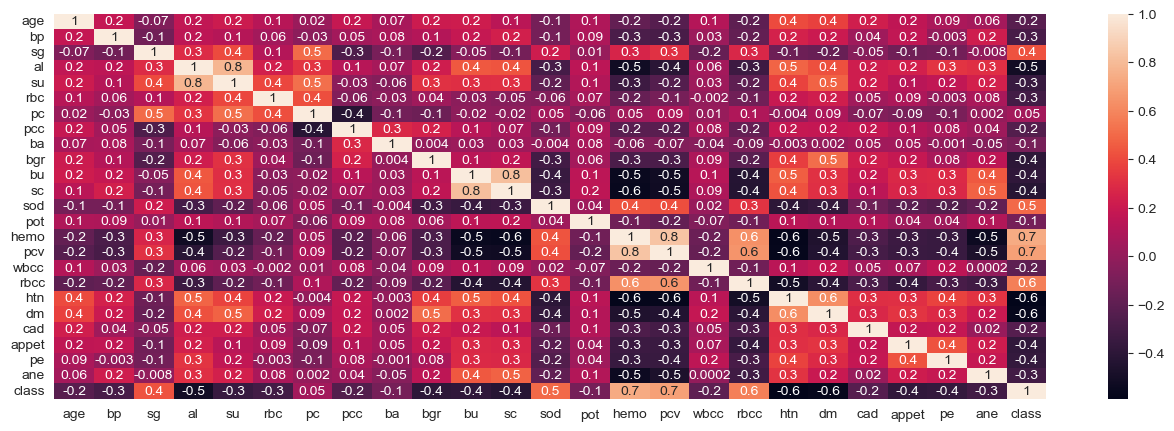

In [110]:
print('Regular data')
plt.figure(figsize=(16,5))
sea.heatmap(data.corr(),annot = True, fmt='.1g')
plt.show()

MinMax scaled data


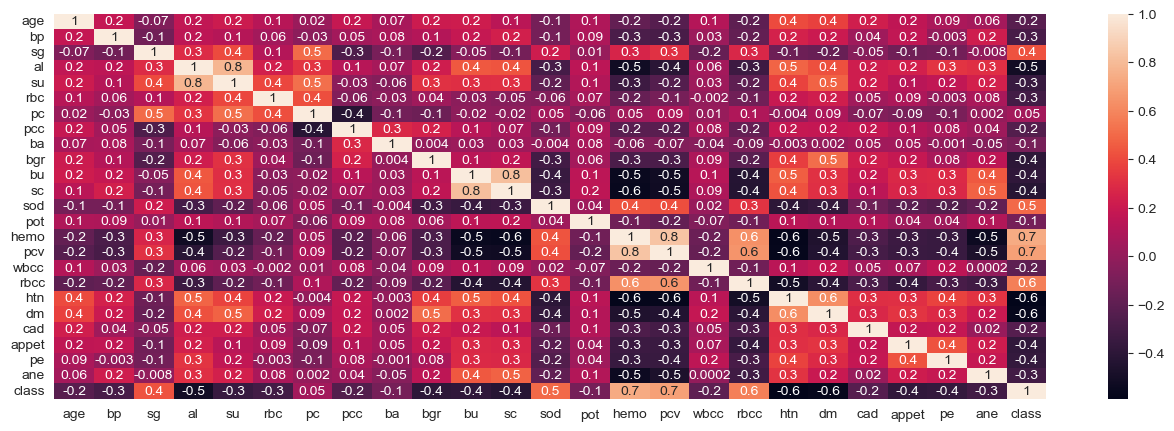

In [111]:
print('MinMax scaled data')
plt.figure(figsize=(16,5))

sea.heatmap(min_max_scaler(data).corr(),annot = True, fmt='.1g')
plt.show()

Clean without feature reduction 


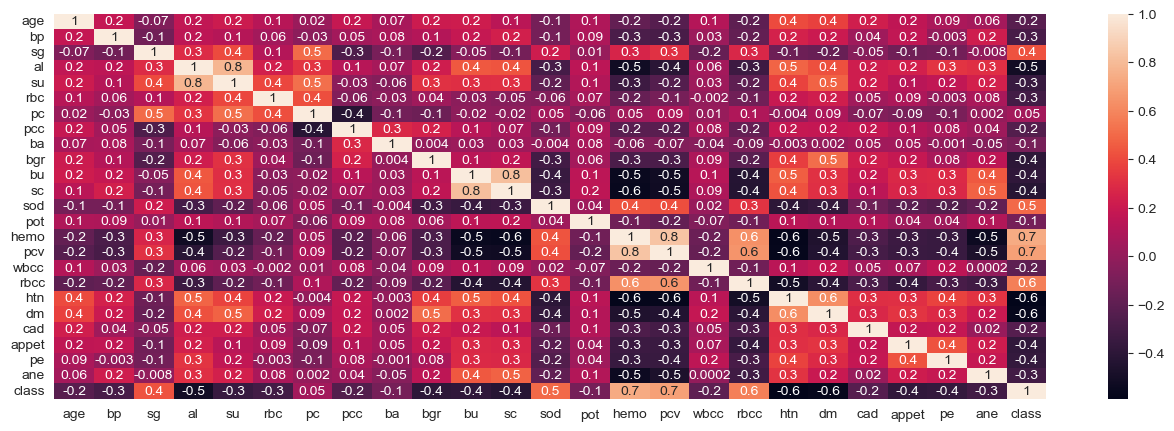

In [112]:
print('Clean without feature reduction ')
plt.figure(figsize=(16,5))

sea.heatmap(min_max_scaler(data).corr(),annot = True, fmt='.1g')
plt.show()

With all transformations


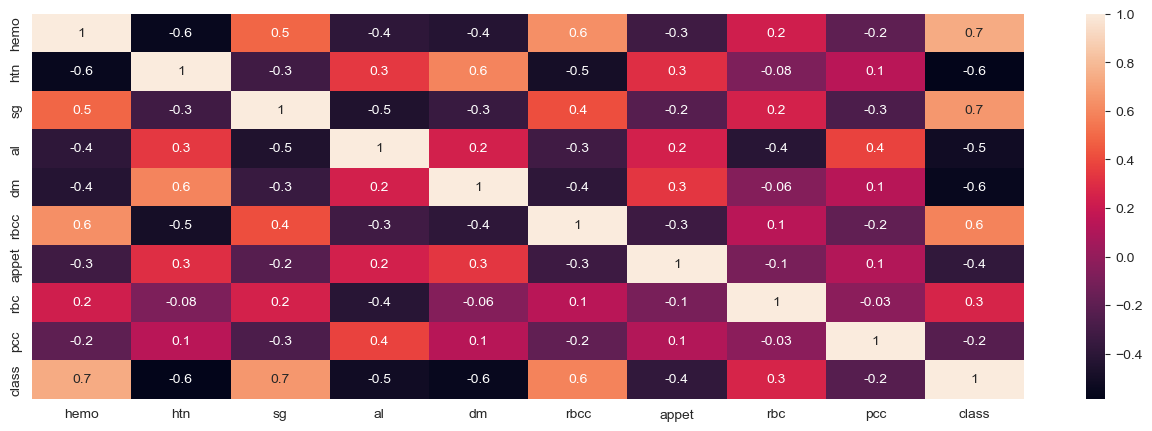

In [113]:
print('With all transformations')
plt.figure(figsize=(16,5))
sea.heatmap(final_extra_trees_classifier.corr(),annot = True, fmt='.1g')

plt.show()


## Summary

- Mali broj instanci, pozeljno preko 1000
- Cak i uz 24 atributa, mozda bi se mogao dodati jos neki jos bi ucinio klasifikator preciznijim